In [19]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

from utils import FORMATTER, FONT

sns.set_theme(style="white", rc={"grid.color": "lightgray"})
plt.rc("axes", titlesize=16, titleweight="bold", labelsize=14, labelweight="bold")
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
font = font_manager.FontProperties(weight="bold")

In [20]:
def smooth_curve(points: np.ndarray, factor: int = 100):
    cumsum = np.cumsum(np.insert(points, 0, 0))
    return (cumsum[factor:] - cumsum[:-factor]) / float(factor)

def plot_result_on_ax(
    ax,
    results: dict,
    dylam_results: dict,
    formatter: ticker.ScalarFormatter,
    colors: dict,
    dylam_label: str = "DyLam",
    smooth_factor: int = 100,
    smooth_factor_min_max: int = 100,
    title: str | None = None,
):
    for method in results.keys():
        mean_key = [
            k for k in results[method].keys()
            if not (k.startswith("Step") or k.endswith("MAX") or k.endswith("MIN"))
        ][0]
        min_key = [k for k in results[method].keys() if k.endswith("MIN")][0]
        max_key = [k for k in results[method].keys() if k.endswith("MAX")][0]

        x = results[method]["Step"].loc[smooth_factor - 1 :]
        y = smooth_curve(results[method][mean_key], factor=smooth_factor)
        ax.plot(x, y, label=method, color=colors[method])

        x = results[method]["Step"].loc[smooth_factor_min_max - 1 :]
        y_min = smooth_curve(results[method][min_key], smooth_factor_min_max)
        y_max = smooth_curve(results[method][max_key], smooth_factor_min_max)
        ax.fill_between(x, y_min, y_max, color=colors[method], alpha=0.2)

    mean_key = [
        k for k in dylam_results.keys()
        if not (k.startswith("Step") or k.endswith("MAX") or k.endswith("MIN"))
    ][0]
    min_key = [k for k in dylam_results.keys() if k.endswith("MIN")][0]
    max_key = [k for k in dylam_results.keys() if k.endswith("MAX")][0]

    x = dylam_results["Step"].loc[smooth_factor - 1 :]
    y = smooth_curve(dylam_results[mean_key], factor=smooth_factor)
    ax.plot(x, y, label=dylam_label, color=colors["DyLam"])

    x = dylam_results["Step"].loc[smooth_factor_min_max - 1 :]
    y_min = smooth_curve(dylam_results[min_key], smooth_factor_min_max)
    y_max = smooth_curve(dylam_results[max_key], smooth_factor_min_max)
    ax.fill_between(x, y_min, y_max, color=colors["DyLam"], alpha=0.2)

    ax.grid(True)

    if title is not None:
        ax.set_title(title)

    ax.yaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_formatter(formatter)


## Tau ablation

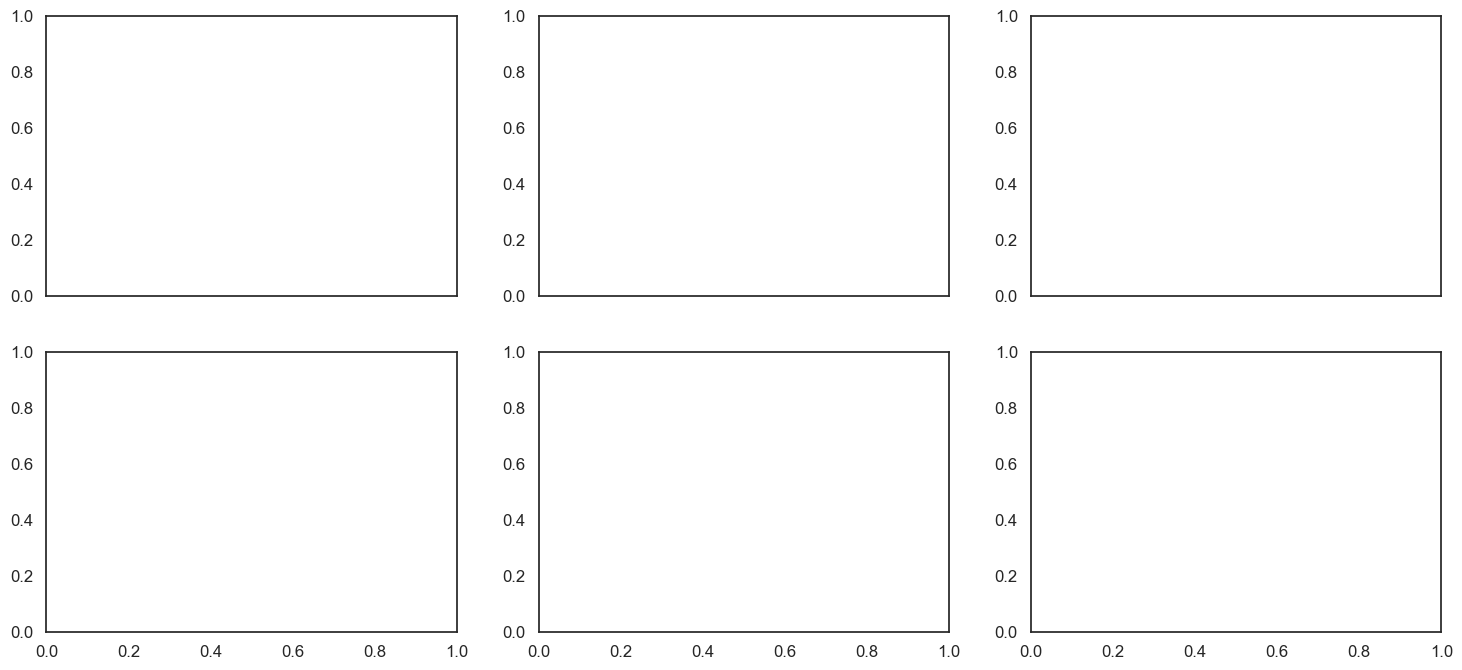

In [21]:
TAU_METHOD_COLORS = {
    "0.5": "#65EA39",
    "0.7": "#EA3965",
    "DyLam": "#3965EA",
}

rewards = {comp: {str(tau/10): pd.read_csv(f"tau/rew-{comp}-{tau}.csv") for tau in [5, 7]} for comp in ["Banana", "Chicken", "Gate"]}
dylam_rewards = {comp: pd.read_csv(f"ChickenBanana/rew-{comp}.csv") for comp in ["Banana", "Chicken", "Gate"]}

lambdas = {comp: {str(tau/10): pd.read_csv(f"tau/lambda-{comp}-{tau}.csv") for tau in [5, 7]} for comp in ["Banana", "Chicken", "Gate"]}
dylam_lambdas = {comp: pd.read_csv(f"ChickenBanana/lambda-{comp}.csv") for comp in ["Banana", "Chicken", "Gate"]}

fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(18, 8),
    sharex=True,
)

components = ["Banana", "Chicken", "Gate"]

fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(18, 8),
    sharex=True,
)

components = ["Banana", "Chicken", "Gate"]

for col, comp in enumerate(components):
    # ---------- Row 1: Rewards ----------
    ax = axes[0, col]
    plot_result_on_ax(
        ax=ax,
        results=rewards[comp],
        dylam_results=dylam_rewards[comp],
        formatter=FORMATTER,
        colors=TAU_METHOD_COLORS,
        dylam_label="0.99",
        title=f"{comp} Component",
    )

    # Y label only on first column
    if col == 0:
        ax.set_ylabel("Cumulative Episode Reward")

    # ---------- Row 2: Lambda ----------
    ax = axes[1, col]
    plot_result_on_ax(
        ax=ax,
        results=lambdas[comp],
        dylam_results=dylam_lambdas[comp],
        formatter=FORMATTER,
        colors=TAU_METHOD_COLORS,
        dylam_label="0.99",
        title=None,
    )

    # Y label only on first column
    if col == 0:
        ax.set_ylabel("Lambda Value")

    # X label only on bottom row
    ax.set_xlabel("Number of training steps")


handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=4, prop=FONT)

fig.tight_layout(rect=[0, 0.06, 1, 1])
fig.savefig("./tau/combined_results.pdf", bbox_inches="tight")
plt.close(fig)


## RB ablation

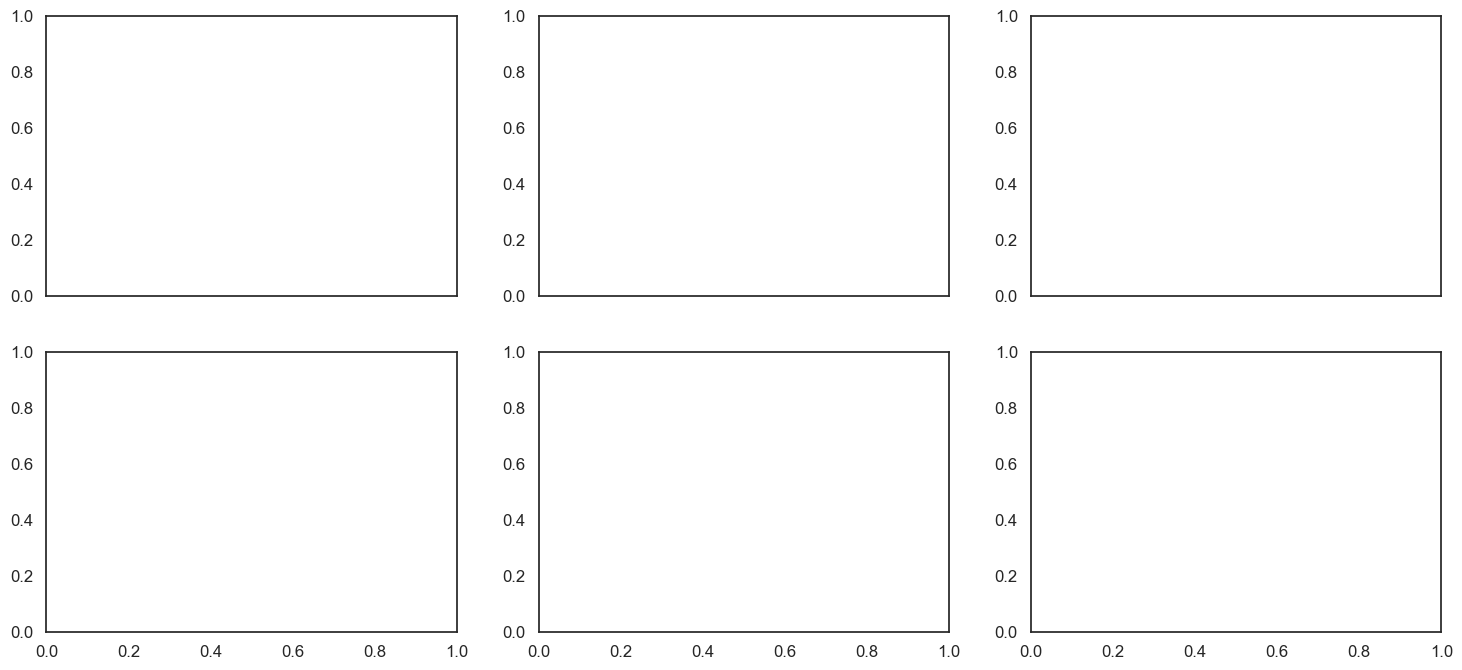

In [22]:
RB_METHOD_COLORS = {
    "50": "#65EA39",
    "100": "#EA3965",
    "DyLam": "#3965EA",
}

rewards = {comp: {str(rb): pd.read_csv(f"rb/rew-{comp}-{rb}.csv") for rb in [50, 100]} for comp in ["Banana", "Chicken", "Gate"]}
dylam_rewards = {comp: pd.read_csv(f"ChickenBanana/rew-{comp}.csv") for comp in ["Banana", "Chicken", "Gate"]}

lambdas = {comp: {str(rb): pd.read_csv(f"rb/lambda-{comp}-{rb}.csv") for rb in [50, 100]} for comp in ["Banana", "Chicken", "Gate"]}
dylam_lambdas = {comp: pd.read_csv(f"ChickenBanana/lambda-{comp}.csv") for comp in ["Banana", "Chicken", "Gate"]}

fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(18, 8),
    sharex=True,
)

components = ["Banana", "Chicken", "Gate"]

fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(18, 8),
    sharex=True,
)

components = ["Banana", "Chicken", "Gate"]

for col, comp in enumerate(components):
    # ---------- Row 1: Rewards ----------
    ax = axes[0, col]
    plot_result_on_ax(
        ax=ax,
        results=rewards[comp],
        dylam_results=dylam_rewards[comp],
        formatter=FORMATTER,
        colors=RB_METHOD_COLORS,
        dylam_label="10",
        title=f"{comp} Component",
    )

    # Y label only on first column
    if col == 0:
        ax.set_ylabel("Cumulative Episode Reward")

    # ---------- Row 2: Lambda ----------
    ax = axes[1, col]
    plot_result_on_ax(
        ax=ax,
        results=lambdas[comp],
        dylam_results=dylam_lambdas[comp],
        formatter=FORMATTER,
        colors=RB_METHOD_COLORS,
        dylam_label="10",
        title=None,
    )

    # Y label only on first column
    if col == 0:
        ax.set_ylabel("Lambda Value")

    # X label only on bottom row
    ax.set_xlabel("Number of training steps")


handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=4, prop=FONT)

fig.tight_layout(rect=[0, 0.06, 1, 1])
fig.savefig("./rb/combined_results.pdf", bbox_inches="tight")
plt.close(fig)

## Normalizer ablation

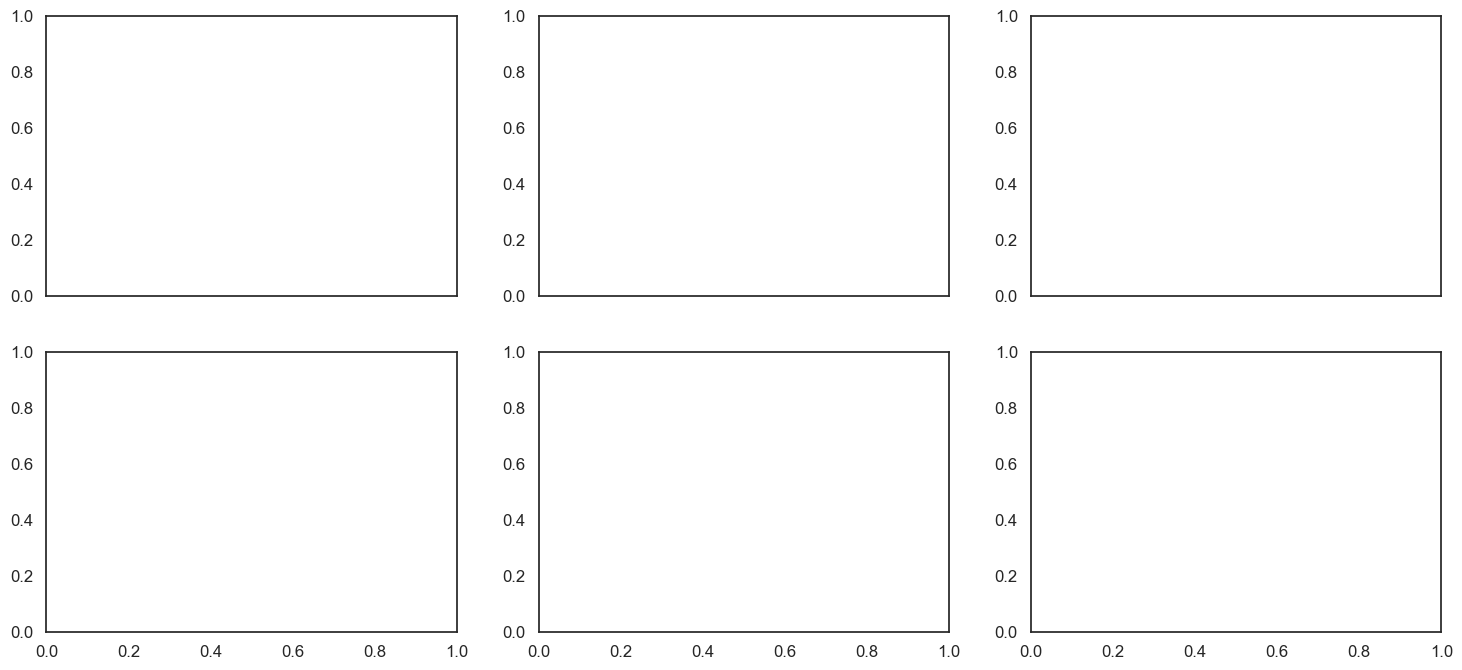

In [23]:
NORMALIZER_METHOD_COLORS = {
    "l1": "#39EA65",
    "minmax": "#EA3965",
    "DyLam": "#3965EA",
}

rewards = {comp: {normalizer: pd.read_csv(f"normalizer/rew-{comp}-{normalizer}.csv") for normalizer in ["l1", "minmax"]} for comp in ["Banana", "Chicken", "Gate"]}
dylam_rewards = {comp: pd.read_csv(f"ChickenBanana/rew-{comp}.csv") for comp in ["Banana", "Chicken", "Gate"]}

lambdas = {comp: {normalizer: pd.read_csv(f"normalizer/lambda-{comp}-{normalizer}.csv") for normalizer in ["l1", "minmax"]} for comp in ["Banana", "Chicken", "Gate"]}
dylam_lambdas = {comp: pd.read_csv(f"ChickenBanana/lambda-{comp}.csv") for comp in ["Banana", "Chicken", "Gate"]}

fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(18, 8),
    sharex=True,
)

components = ["Banana", "Chicken", "Gate"]

fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(18, 8),
    sharex=True,
)

components = ["Banana", "Chicken", "Gate"]

for col, comp in enumerate(components):
    # ---------- Row 1: Rewards ----------
    ax = axes[0, col]
    plot_result_on_ax(
        ax=ax,
        results=rewards[comp],
        dylam_results=dylam_rewards[comp],
        formatter=FORMATTER,
        colors=NORMALIZER_METHOD_COLORS,
        dylam_label="softmax",
        title=f"{comp} Component",
    )

    # Y label only on first column
    if col == 0:
        ax.set_ylabel("Cumulative Episode Reward")

    # ---------- Row 2: Lambda ----------
    ax = axes[1, col]
    plot_result_on_ax(
        ax=ax,
        results=lambdas[comp],
        dylam_results=dylam_lambdas[comp],
        formatter=FORMATTER,
        colors=NORMALIZER_METHOD_COLORS,
        dylam_label="softmax",
        title=None,
    )

    # Y label only on first column
    if col == 0:
        ax.set_ylabel("Lambda Value")

    # X label only on bottom row
    ax.set_xlabel("Number of training steps")


handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=4, prop=FONT)

fig.tight_layout(rect=[0, 0.06, 1, 1])
fig.savefig("./normalizer/combined_results.pdf", bbox_inches="tight")
plt.close(fig)


## Epsilon ablation

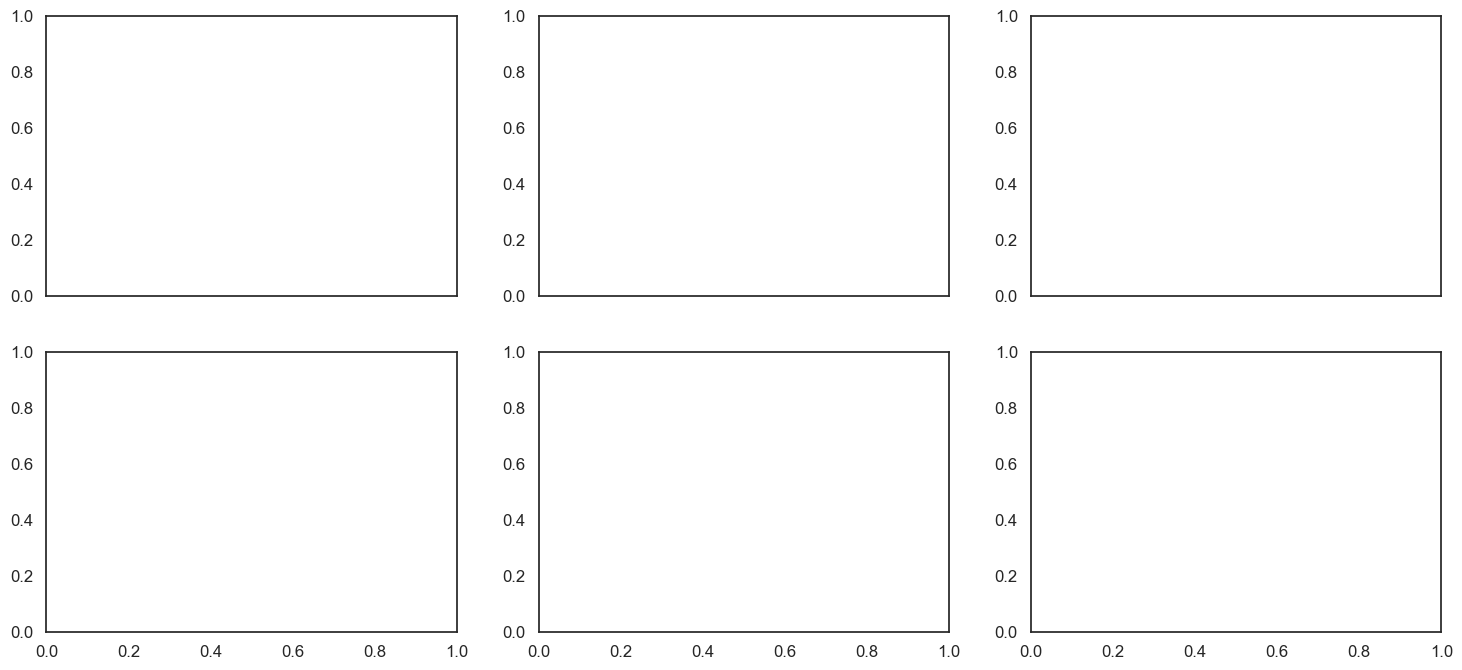

In [24]:
EPSILON_METHOD_COLORS = {
    "0.8": "#65EA39",
    "0.9": "#EA39BE",
    "DyLam": "#3965EA",
}

rewards = {comp: {epsilon: pd.read_csv(f"epsilon/rew-{comp}-{int(float(epsilon)*100)}.csv") for epsilon in ["0.8", "0.9"]} for comp in ["Banana", "Chicken", "Gate"]}
dylam_rewards = {comp: pd.read_csv(f"ChickenBanana/rew-{comp}.csv") for comp in ["Banana", "Chicken", "Gate"]}

lambdas = {comp: {epsilon: pd.read_csv(f"epsilon/lambda-{comp}-{int(float(epsilon)*100)}.csv") for epsilon in ["0.8", "0.9"]} for comp in ["Banana", "Chicken", "Gate"]}
dylam_lambdas = {comp: pd.read_csv(f"ChickenBanana/lambda-{comp}.csv") for comp in ["Banana", "Chicken", "Gate"]}

fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(18, 8),
    sharex=True,
)

components = ["Banana", "Chicken", "Gate"]

fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(18, 8),
    sharex=True,
)

components = ["Banana", "Chicken", "Gate"]

for col, comp in enumerate(components):
    # ---------- Row 1: Rewards ----------
    ax = axes[0, col]
    plot_result_on_ax(
        ax=ax,
        results=rewards[comp],
        dylam_results=dylam_rewards[comp],
        formatter=FORMATTER,
        colors=EPSILON_METHOD_COLORS,
        dylam_label="0.99",
        title=f"{comp} Component",
    )

    # Y label only on first column
    if col == 0:
        ax.set_ylabel("Cumulative Episode Reward")

    # ---------- Row 2: Lambda ----------
    ax = axes[1, col]
    plot_result_on_ax(
        ax=ax,
        results=lambdas[comp],
        dylam_results=dylam_lambdas[comp],
        formatter=FORMATTER,
        colors=EPSILON_METHOD_COLORS,
        dylam_label="0.99",
        title=None,
    )

    # Y label only on first column
    if col == 0:
        ax.set_ylabel("Lambda Value")

    # X label only on bottom row
    ax.set_xlabel("Number of training steps")


handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=4, prop=FONT)

fig.tight_layout(rect=[0, 0.06, 1, 1])
fig.savefig("./epsilon/combined_results.pdf", bbox_inches="tight")
plt.close(fig)
